In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
targets = pd.read_csv("../../data/Targets_and_commitments.csv", sep=",")
columns = ['ISSUER_ISIN',
           'CARBON_EMISSIONS_TARGET_BASE_YEAR',
           'CARBON_EMISSIONS_TARGET_REDUCT_PCT',
           'CARBON_EMISSIONS_TARGET_YEAR',
           'HAS_COMMITTED_TO_SBTI_TARGET',
           'HAS_SBTI_APPROVED_TARGET',
           'TARGET_SUMMARY_ANNUAL_REDUCTION',
           'TARGET_SUMMARY_CUM_CHANGE_2030', 
           'TARGET_SUMMARY_CUM_CHANGE_2050',
           'TARGET_SUMMARY_CUM_CHANGE_2070',
           'TARGET_SUMMARY_CURRENT_PROGRESS',
           'TARGET_SUMMARY_NNZERO_2030',
           'TARGET_SUMMARY_NNZERO_2050',
           'TARGET_SUMMARY_NNZERO_2070',
           'TARGET_SUMMARY_SCOPES',
           'TARGET_SUMMARY_SELF_DECLARED_NZERO',
           'TARGET_SUMMARY_TRACK_RECORD',
           'TARGET_SUMMARY_TYPES',
           'TARGET_SUMMARY_UNITS']

targets = targets[columns]
targets

,ISSUER_ISIN,CARBON_EMISSIONS_TARGET_BASE_YEAR,CARBON_EMISSIONS_TARGET_REDUCT_PCT,CARBON_EMISSIONS_TARGET_YEAR,HAS_COMMITTED_TO_SBTI_TARGET,HAS_SBTI_APPROVED_TARGET,TARGET_SUMMARY_ANNUAL_REDUCTION,TARGET_SUMMARY_CUM_CHANGE_2030,TARGET_SUMMARY_CUM_CHANGE_2050,TARGET_SUMMARY_CUM_CHANGE_2070,TARGET_SUMMARY_CURRENT_PROGRESS,TARGET_SUMMARY_NNZERO_2030,TARGET_SUMMARY_NNZERO_2050,TARGET_SUMMARY_NNZERO_2070,TARGET_SUMMARY_SCOPES,TARGET_SUMMARY_SELF_DECLARED_NZERO,TARGET_SUMMARY_TRACK_RECORD,TARGET_SUMMARY_TYPES,TARGET_SUMMARY_UNITS
0,US1264081035,2014.0,37.3,2030.0,NaN,True,-0.010626,-0.069048,0.049633,0.194446,Not on track with any targets,NaN,NaN,NaN,"1,2",NaN,Met some targets,INTENSITY,Other
1,US1270971039,2019.0,81.0,2023.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA5592224011,2021.0,100.0,2050.0,NaN,True,-0.035714,-0.298376,-1.000000,-1.000000,Not on track with any targets,NaN,True,True,"1,2,3",True,Met some targets,ABSOLUTE,tCO2e
3,US8326964058,2019.0,28.0,2030.0,NaN,True,-0.002010,-0.016084,-0.014692,-0.012993,On track with some targets,NaN,NaN,NaN,"1,2,3",NaN,Met some targets,"ABSOLUTE, INTENSITY","tCO2e, tCO2e/unit of production"
4,US8425871071,2007.0,100.0,2050.0,NaN,False,-0.025491,-0.042689,-0.713745,-0.650715,On track with all targets,NaN,NaN,NaN,1,NaN,Met some targets,ABSOLUTE,tCO2e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,US31488V1070,2020.0,35.0,2026.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1386,IE000IVNQZ81,2022.0,30.0,2032.0,True,True,-0.036983,-0.307717,-0.369834,-0.369834,On track with some targets,NaN,NaN,NaN,"1,2,3",NaN,Met some targets,ABSOLUTE,tCO2e
1387,US88339J1051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1388,CA89156V1067,2020.0,55.0,2027.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
msci = pd.read_csv("../../data/CarbonIntensity.csv", sep=",")
columns = ["ISSUER_ISIN", "Weight"] + [col for col in msci.columns if ("CI_Scope" in col or "CARBON_EMISSIONS_SCOPE" in col)]

msci = msci[columns]
msci.head()

,ISSUER_ISIN,Weight,CI_Scope12_FY09,CI_Scope12_FY10,CI_Scope12_FY11,CI_Scope12_FY12,CI_Scope12_FY13,CI_Scope12_FY14,CI_Scope12_FY15,CI_Scope12_FY16,...,CARBON_EMISSIONS_SCOPE_12_FY41,CARBON_EMISSIONS_SCOPE_12_FY42,CARBON_EMISSIONS_SCOPE_12_FY43,CARBON_EMISSIONS_SCOPE_12_FY44,CARBON_EMISSIONS_SCOPE_12_FY45,CARBON_EMISSIONS_SCOPE_12_FY46,CARBON_EMISSIONS_SCOPE_12_FY47,CARBON_EMISSIONS_SCOPE_12_FY48,CARBON_EMISSIONS_SCOPE_12_FY49,CARBON_EMISSIONS_SCOPE_12_FY50
0,US1264081035,0.001031,343.087944,373.246503,388.581565,379.960087,379.679334,398.453435,380.752337,341.407996,...,2.397651e+06,2.285349e+06,2.173048e+06,2.060746e+06,1.948445e+06,1.836143e+06,1.723841e+06,1.611540e+06,1.499238e+06,1.386937e+06
1,US1270971039,0.000281,64.224666,61.650774,186.321429,216.877903,101.433322,76.164849,92.941063,83.476953,...,2.550349e+06,2.594285e+06,2.638222e+06,2.682158e+06,2.726094e+06,2.770031e+06,2.813967e+06,2.857904e+06,2.901840e+06,2.945776e+06
2,CA5592224011,0.000191,14.742824,30.100456,27.950685,34.495488,37.414570,40.303825,37.946070,46.876969,...,3.103982e+06,3.163865e+06,3.223749e+06,3.283632e+06,3.343516e+06,3.403399e+06,3.463282e+06,3.523166e+06,3.583049e+06,3.642933e+06
3,US8326964058,0.000177,49.206720,49.829190,45.719613,43.657916,44.984288,38.130877,40.458997,39.204275,...,4.297488e+05,4.321498e+05,4.345509e+05,4.369520e+05,4.393531e+05,4.417542e+05,4.441553e+05,4.465564e+05,4.489575e+05,4.513586e+05
4,US8425871071,0.001427,4893.920010,5315.984002,4881.395161,4012.863660,4134.739120,4538.453847,4136.988635,4071.259138,...,1.641127e+07,1.290634e+07,9.401408e+06,5.896478e+06,2.391549e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [36]:
# Join on ISSUER_ISIN
msci_vs_target = pd.merge(msci, targets, how="left", on="ISSUER_ISIN")

msci_vs_target

,ISSUER_ISIN,Weight,CI_Scope12_FY09,CI_Scope12_FY10,CI_Scope12_FY11,CI_Scope12_FY12,CI_Scope12_FY13,CI_Scope12_FY14,CI_Scope12_FY15,CI_Scope12_FY16,...,TARGET_SUMMARY_CUM_CHANGE_2070,TARGET_SUMMARY_CURRENT_PROGRESS,TARGET_SUMMARY_NNZERO_2030,TARGET_SUMMARY_NNZERO_2050,TARGET_SUMMARY_NNZERO_2070,TARGET_SUMMARY_SCOPES,TARGET_SUMMARY_SELF_DECLARED_NZERO,TARGET_SUMMARY_TRACK_RECORD,TARGET_SUMMARY_TYPES,TARGET_SUMMARY_UNITS
0,US1264081035,0.001031,343.087944,373.246503,388.581565,379.960087,379.679334,398.453435,380.752337,341.407996,...,0.194446,Not on track with any targets,NaN,NaN,NaN,"1,2",NaN,Met some targets,INTENSITY,Other
1,US1270971039,0.000281,64.224666,61.650774,186.321429,216.877903,101.433322,76.164849,92.941063,83.476953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA5592224011,0.000191,14.742824,30.100456,27.950685,34.495488,37.414570,40.303825,37.946070,46.876969,...,-1.000000,Not on track with any targets,NaN,True,True,"1,2,3",True,Met some targets,ABSOLUTE,tCO2e
3,US8326964058,0.000177,49.206720,49.829190,45.719613,43.657916,44.984288,38.130877,40.458997,39.204275,...,-0.012993,On track with some targets,NaN,NaN,NaN,"1,2,3",NaN,Met some targets,"ABSOLUTE, INTENSITY","tCO2e, tCO2e/unit of production"
4,US8425871071,0.001427,4893.920010,5315.984002,4881.395161,4012.863660,4134.739120,4538.453847,4136.988635,4071.259138,...,-0.650715,On track with all targets,NaN,NaN,NaN,1,NaN,Met some targets,ABSOLUTE,tCO2e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,US5049221055,0.000299,11.465268,12.220349,13.535143,14.325747,14.671589,15.185091,21.485166,23.838064,...,-0.015092,On track with some targets,NaN,NaN,NaN,"1,2,3",NaN,Not applicable,ABSOLUTE,tCO2e
1128,US4385161066,0.002251,126.421363,136.808276,223.801211,198.819459,166.587502,157.110660,143.531122,115.062708,...,-0.146516,On track with some targets,NaN,NaN,NaN,"1,2,3",NaN,Met some targets,ABSOLUTE,tCO2e
1129,US88160R1014,0.014990,0.032106,0.033491,0.058580,0.118535,0.571275,0.903620,1.197968,1.729057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1130,US31488V1070,0.000612,22.528434,25.169948,23.137675,20.369745,11.657678,11.739619,11.169302,10.730921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/v5/_0ss5l5d6nz8d575gs5spbx40000gn/T/ipykernel_1642/1573232201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=msci_vs_target, x='TARGET_SUMMARY_CURRENT_PROGRESS', y="Weight", palette='viridis', estimator="sum", errorbar=None)


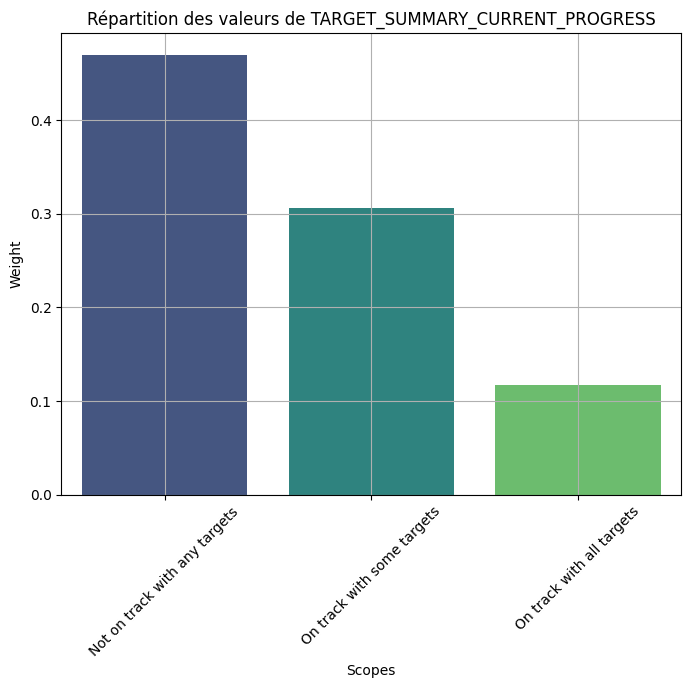

In [37]:
plt.figure(figsize=(8, 6))

sns.barplot(data=msci_vs_target, x='TARGET_SUMMARY_CURRENT_PROGRESS', y="Weight", palette='viridis', estimator="sum", errorbar=None)

plt.title("Répartition des valeurs de TARGET_SUMMARY_CURRENT_PROGRESS")
plt.xlabel("Scopes")
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

In [38]:
frequency_table = pd.DataFrame({
    'HAS_COMMITTED_TO_SBTI_TARGET': [
        msci_vs_target.loc[msci_vs_target['HAS_COMMITTED_TO_SBTI_TARGET'].isna(), "Weight"].sum(),       
        msci_vs_target.loc[msci_vs_target['HAS_COMMITTED_TO_SBTI_TARGET'] == True, "Weight"].sum(),    
        msci_vs_target.loc[msci_vs_target['HAS_COMMITTED_TO_SBTI_TARGET'] == False, "Weight"].sum()  
    ],
    'HAS_SBTI_APPROVED_TARGET': [
        msci_vs_target.loc[msci_vs_target['HAS_SBTI_APPROVED_TARGET'].isna(), "Weight"].sum(),            
        msci_vs_target.loc[msci_vs_target['HAS_SBTI_APPROVED_TARGET'] == True, "Weight"].sum(),       
        msci_vs_target.loc[msci_vs_target['HAS_SBTI_APPROVED_TARGET'] == False, "Weight"].sum()        
    ]
}, index=['NaN', 'True', 'False'])

print(frequency_table)

       HAS_COMMITTED_TO_SBTI_TARGET  HAS_SBTI_APPROVED_TARGET
NaN                        0.560656                  0.391580
True                       0.109552                  0.490675
False                      0.329792                  0.117744


In [39]:
# Convertir 'HAS_SBTI_APPROVED_TARGET' en chaîne de caractères ('nan', 'true', 'false')
msci_vs_target['HAS_SBTI_APPROVED_TARGET'] = msci_vs_target['HAS_SBTI_APPROVED_TARGET'].apply(
    lambda x: 'nan' if pd.isna(x) else ('true' if x else 'false')
)

# Filtrer les données en fonction de la colonne 'HAS_COMMITTED_TO_SBTI_TARGET'
msci_vs_target_committed_nan = msci_vs_target[msci_vs_target['HAS_COMMITTED_TO_SBTI_TARGET'].isna()]
msci_vs_target_committed_false = msci_vs_target[msci_vs_target['HAS_COMMITTED_TO_SBTI_TARGET'] == False]
msci_vs_target_committed_true = msci_vs_target[msci_vs_target['HAS_COMMITTED_TO_SBTI_TARGET'] == True]

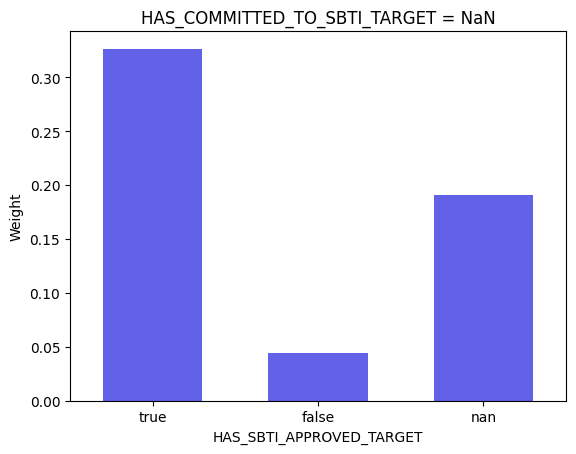

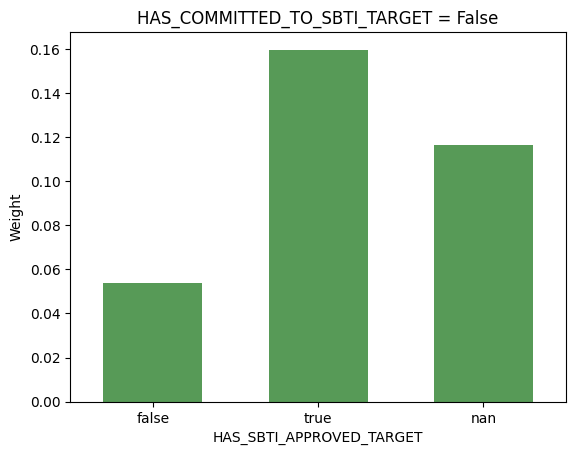

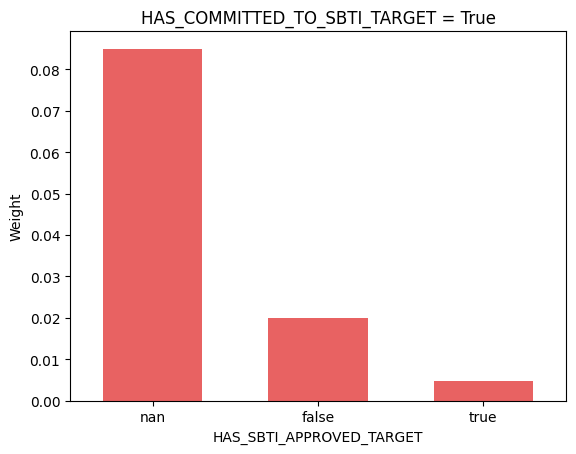

In [40]:
sns.barplot(data=msci_vs_target_committed_nan, x="HAS_SBTI_APPROVED_TARGET", y="Weight", estimator="sum", color='blue', alpha=0.7, width=0.6, errorbar=None)
plt.title("HAS_COMMITTED_TO_SBTI_TARGET = NaN")
plt.xlabel("HAS_SBTI_APPROVED_TARGET")
plt.ylabel("Weight")
plt.show()

sns.barplot(data=msci_vs_target_committed_false, x="HAS_SBTI_APPROVED_TARGET", y="Weight", estimator="sum", color='green', alpha=0.7, width=0.6, errorbar=None)
plt.title("HAS_COMMITTED_TO_SBTI_TARGET = False")
plt.xlabel("HAS_SBTI_APPROVED_TARGET")
plt.ylabel("Weight")
plt.show()

sns.barplot(data=msci_vs_target_committed_true, x="HAS_SBTI_APPROVED_TARGET", y="Weight", estimator="sum", color='red', alpha=0.7, width=0.6, errorbar=None)
plt.title("HAS_COMMITTED_TO_SBTI_TARGET = True")
plt.xlabel("HAS_SBTI_APPROVED_TARGET")
plt.ylabel("Weight")
plt.show()

/var/folders/v5/_0ss5l5d6nz8d575gs5spbx40000gn/T/ipykernel_1642/4220115228.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=msci_vs_target, x='TARGET_SUMMARY_TYPES', y="Weight", estimator="sum", errorbar=None, palette='viridis')


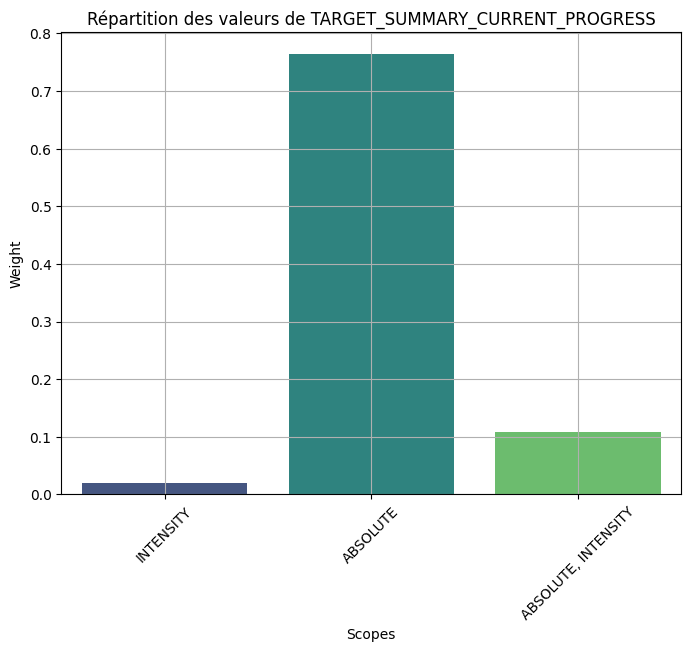

In [41]:
plt.figure(figsize=(8, 6))

sns.barplot(data=msci_vs_target, x='TARGET_SUMMARY_TYPES', y="Weight", estimator="sum", errorbar=None, palette='viridis')

plt.title("Répartition des valeurs de TARGET_SUMMARY_CURRENT_PROGRESS")
plt.xlabel("Scopes")
plt.ylabel("Weight")
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

### Comparaison Engagement / Projections

In [78]:
print(list(msci_vs_target.columns))

msci_vs_target.loc[msci_vs_target["ISSUER_ISIN"] == "US1264081035", ["CARBON_EMISSIONS_TARGET_BASE_YEAR", "CARBON_EMISSIONS_TARGET_REDUCT_PCT", "TARGET_SUMMARY_SCOPES", "CARBON_EMISSIONS_TARGET_YEAR"]]


def project_engagement(issuer):
    issuer_data = msci_vs_target[msci_vs_target["ISSUER_ISIN"] == issuer]

    base_year = issuer_data["CARBON_EMISSIONS_TARGET_BASE_YEAR"].values[0]
    reduction_pct = issuer_data["CARBON_EMISSIONS_TARGET_REDUCT_PCT"].values[0]
    target_year = issuer_data["CARBON_EMISSIONS_TARGET_YEAR"].values[0]

    base_emissions = issuer_data[f"CARBON_EMISSIONS_SCOPE_12_FY{str(int(base_year))[-2:]}"].values[0]
    target_emissions = base_emissions * (1 - reduction_pct / 100)
    step = (target_emissions - base_emissions) / (target_year - base_year)

    # Calculer toutes les emissions jusqu'à l'année cible
    years = np.arange(base_year, target_year + 1, dtype=int)
    emissions = np.zeros(len(years))
    emissions[0] = base_emissions
    for i in range(1, len(years)):
        emissions[i] = emissions[i - 1] + step
    
    return years, emissions


project_engagement("US1264081035")
    

['ISSUER_ISIN', 'Weight', 'CI_Scope12_FY09', 'CI_Scope12_FY10', 'CI_Scope12_FY11', 'CI_Scope12_FY12', 'CI_Scope12_FY13', 'CI_Scope12_FY14', 'CI_Scope12_FY15', 'CI_Scope12_FY16', 'CI_Scope12_FY17', 'CI_Scope12_FY18', 'CI_Scope12_FY19', 'CI_Scope12_FY20', 'CI_Scope12_FY21', 'CI_Scope12_FY22', 'CI_Scope12_FY23', 'CI_Scope12_FY24', 'CI_Scope12_FY25', 'CI_Scope12_FY26', 'CI_Scope12_FY27', 'CI_Scope12_FY28', 'CI_Scope12_FY29', 'CI_Scope12_FY30', 'CI_Scope12_FY31', 'CI_Scope12_FY32', 'CI_Scope12_FY33', 'CI_Scope12_FY34', 'CI_Scope12_FY35', 'CI_Scope12_FY36', 'CI_Scope12_FY37', 'CI_Scope12_FY38', 'CI_Scope12_FY39', 'CI_Scope12_FY40', 'CI_Scope12_FY41', 'CI_Scope12_FY42', 'CI_Scope12_FY43', 'CI_Scope12_FY44', 'CI_Scope12_FY45', 'CI_Scope12_FY46', 'CI_Scope12_FY47', 'CI_Scope12_FY48', 'CI_Scope12_FY49', 'CI_Scope12_FY50', 'CARBON_EMISSIONS_SCOPE_12_FY09', 'CARBON_EMISSIONS_SCOPE_12_FY10', 'CARBON_EMISSIONS_SCOPE_12_FY11', 'CARBON_EMISSIONS_SCOPE_12_FY12', 'CARBON_EMISSIONS_SCOPE_12_FY13', 'CARBO

(array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
        2025, 2026, 2027, 2028, 2029, 2030]),
 array([5840132.     , 5703983.92275, 5567835.8455 , 5431687.76825,
        5295539.691  , 5159391.61375, 5023243.5365 , 4887095.45925,
        4750947.382  , 4614799.30475, 4478651.2275 , 4342503.15025,
        4206355.073  , 4070206.99575, 3934058.9185 , 3797910.84125,
        3661762.764  ]))

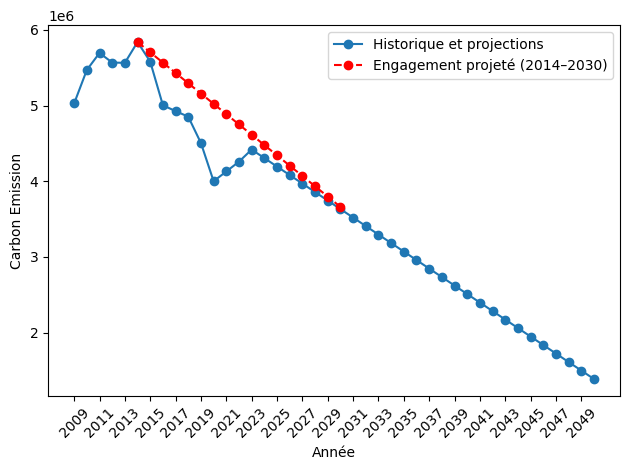

In [85]:
import matplotlib.pyplot as plt

# 1. Tracer les émissions historiques
emission_cols = [col for col in msci_vs_target.columns if "CARBON_EMISSIONS_SCOPE_12" in col]
years_full = [int(col.split("FY")[-1]) + 2000 for col in emission_cols]

emissions_data = msci_vs_target.loc[
    msci_vs_target["ISSUER_ISIN"] == "US1264081035",
    emission_cols
].T

emissions_data.index = years_full


plt.plot(emissions_data.index, emissions_data.values, marker='o', label="Historique et projections")


years_proj, emissions_proj = project_engagement("US1264081035")


plt.plot(
    years_proj, 
    emissions_proj, 
    label="Engagement projeté (2014–2030)", 
    color='red', 
    linestyle='--', 
    marker='o'
)

plt.xticks(range(min(years_full), max(years_full) + 1, 2), rotation=45)
plt.xlabel("Année")
plt.ylabel("Carbon Emission")
plt.legend()
plt.tight_layout()
plt.show()
